** 02805 Social graphs and interactions **

# Part 1: Network Models

## Watts-Strogatz Networks

** a) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1. **

In [215]:
import networkx as nx
import numpy as np
import pprint

N = 500 # Nodes
avg_deg = 4 # Average degree

# Increasing probability means a more random network
p1 = 0 # Probability 1
p2 = 0.1 # Probability 2
p3 = 1 # Probability 3

# watts_strogatz_graph(n, k, p, seed=None)
wsG1 = nx.watts_strogatz_graph(N, avg_deg, p1)
wsG2 = nx.watts_strogatz_graph(N, avg_deg, p2)
wsG3 = nx.watts_strogatz_graph(N, avg_deg, p3)

# Calculating the average shortest path length
d1 = nx.average_shortest_path_length(wsG1)
d2 = nx.average_shortest_path_length(wsG2)
d3 = nx.average_shortest_path_length(wsG3)

print ("Average shortest path length for graph 1:", d1)
print ("Average shortest path length for graph 2:", d2)
print ("Average shortest path length for graph 3:", d3)

Average shortest path length for graph 1: 62.875751503
Average shortest path length for graph 2: 7.35982364729
Average shortest path length for graph 3: 4.7410741483


>* The higher the probability the more it shortens the path lengths. When the rewiring probability is $p = 1$ the network is fully randomized.. As soon as the probability is at 100% the average path length does not decrease any further.

** b) Generate 50 networks with $N = 500$, $<k> = 4$, for each of $p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}$. Calculate the average of $<d>$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. **

In [216]:
import numpy as np
import pprint

p_vals = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
averages = dict()
graphs = dict()
for p in p_vals:
    averages[p] = list()
    for x in xrange(0, 50):
        graph = nx.watts_strogatz_graph(N, avg_deg, p)
        averages[p].append(nx.average_shortest_path_length(graph))
    graphs[p] = {
        'avg_path_len': averages[p][0:5],
        'avg': sum(averages[p]) / float(len(averages[p])),
        'std': np.std(averages[p])
    }

# show excerpt
pprint.pprint(graphs)


{0: {'avg': 62.87575150300606,
     'avg_path_len': [62.875751503006015,
                      62.875751503006015,
                      62.875751503006015,
                      62.875751503006015,
                      62.875751503006015],
     'std': 7.1054273576010019e-15},
 0.01: {'avg': 23.183351663326654,
        'avg_path_len': [23.235238476953906,
                         21.245042084168336,
                         31.88349498997996,
                         22.622597194388778,
                         21.21232865731463],
        'std': 4.894845425425026},
 0.03: {'avg': 13.058435591182366,
        'avg_path_len': [11.527935871743487,
                         11.951214428857716,
                         17.77040480961924,
                         13.928985971943888,
                         15.272424849699398],
        'std': 1.2955833592516375},
 0.05: {'avg': 10.23612264529058,
        'avg_path_len': [9.163839679358718,
                         10.965915831663327,
        

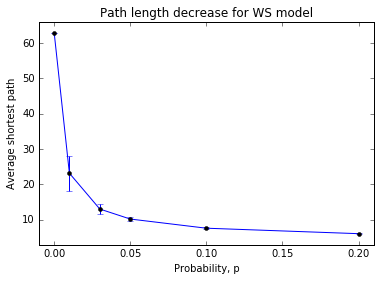

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

# extract axis
x, y, y_err = list(), list(), list()
for key in sorted(graphs): # sort to have the y-axis going from smallest to largest
    x.append(key) # p
    y.append(graphs[key]['avg']) # avg over all 〈d〉
    y_err.append(graphs[key]['std']) # std over all 〈d〉

# Plot
plt.errorbar(x, y, yerr = y_err, marker='o', markersize=4, mfc='black')
plt.axis([min(x)-(max(x)*0.05), max(x)+(max(x)*0.05), min(y)-(max(y)*0.05), max(y)+(max(y)*0.05)])
plt.title("Path length decrease for WS model")
plt.xlabel("Probability, p")
plt.ylabel("Average shortest path")

## The Barabasi-Albert Model

** a) Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX. **

graph consisting of single link: [0, 1] [(0, 1)]
Number of nodes: 100
Number of edges: 99
Degree of each node: Counter({0: 15, 2: 11, 6: 9, 21: 9, 3: 8, 7: 7, 8: 5, 19: 4, 34: 4, 44: 4, 1: 3, 11: 3, 13: 3, 23: 3, 28: 3, 38: 3, 46: 3, 56: 3, 5: 2, 9: 2, 12: 2, 16: 2, 22: 2, 25: 2, 30: 2, 35: 2, 36: 2, 37: 2, 39: 2, 42: 2, 50: 2, 52: 2, 67: 2, 89: 2, 4: 1, 10: 1, 14: 1, 15: 1, 17: 1, 18: 1, 20: 1, 24: 1, 26: 1, 27: 1, 29: 1, 31: 1, 32: 1, 33: 1, 40: 1, 41: 1, 43: 1, 45: 1, 47: 1, 48: 1, 49: 1, 51: 1, 53: 1, 54: 1, 55: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1})


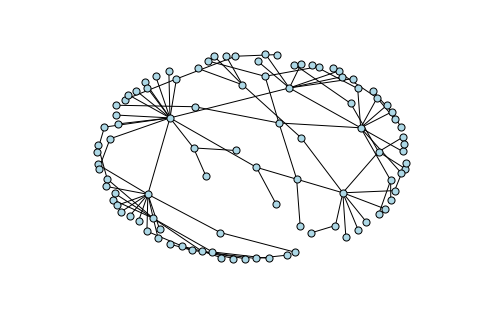

In [220]:
import random as rand
from collections import Counter, OrderedDict
import operator
import matplotlib.pyplot as plt
%matplotlib inline


G = nx.Graph();
nodes = [0,1]
G.add_nodes_from(nodes)
G.add_edge(0,1)
print ("graph consisting of single link:", G.nodes(), G.edges())

# create 100 node network
for node in xrange(2, 100):
    # add another node
    G.add_node(node)
    # connect to one of the existing nodes, choose randomly
    con_n = rand.choice(nodes)
    # add edge
    G.add_edge(node, con_n)
    # extend list of all nodes with node pair
    # is proportional to its connections
    nodes.extend((node, con_n))

# see how many links per node
c1 = Counter(nodes)

# plot
nx.draw_spring(G, node_size=50, node_color='lightblue')

print ("Number of nodes:", len(G.nodes()))
print ("Number of edges:", len(G.edges()))
print ("Degree of each node:",c1)

** b) Now create a 5000 node network. **

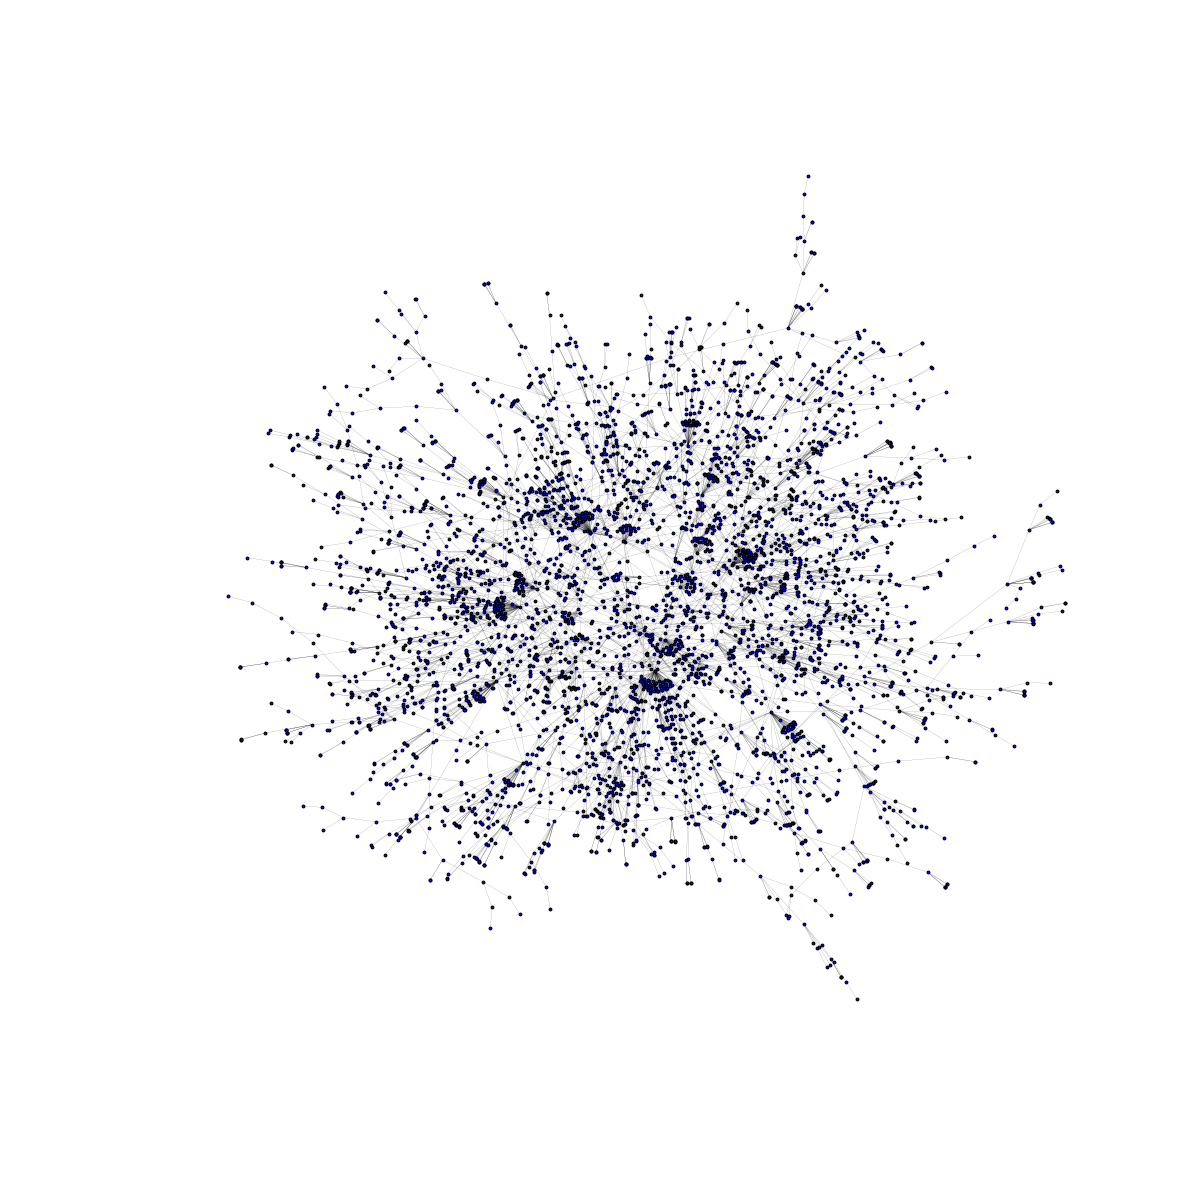

Number of nodes: 5000
Number of edges: 4999


In [183]:
# more nodes for N=5000
for add_node in xrange(100, 5000):
    G.add_node(add_node)
    con_n = rand.choice(nodes)
    G.add_edge(add_node, con_n)
    nodes.extend((add_node, con_n))
    
plt.figure(num=None, figsize=(16, 16), dpi=1200)
nx.draw_spring(G, node_color='blue', with_labels=False, node_size=8, width=0.1)
plt.axis('off')
plt.show()

print ("Number of nodes:", len(G.nodes()))
print ("Number of edges:", len(G.edges()))

** c) What's the maximum and minimum degree? **

In [131]:
# get degree distribution
degree_sequence = sorted(nx.degree(G).values(), reverse=True)
d_min = min(degree_sequence)
d_max = max(degree_sequence)
print ("maximum degree:", d_max, "minimum degree:", d_min)

maximum degree: 150 minimum degree: 1


** d) Now, bin the degree distribution, for example using numpy.histogram. **

In [132]:
import numpy as np
bins = xrange(d_min, d_max+1) 
hist, bin_edges = np.histogram(degree_sequence, bins=bins)

** e) Plot the distribution. Plot it with both linear and log-log axes. **

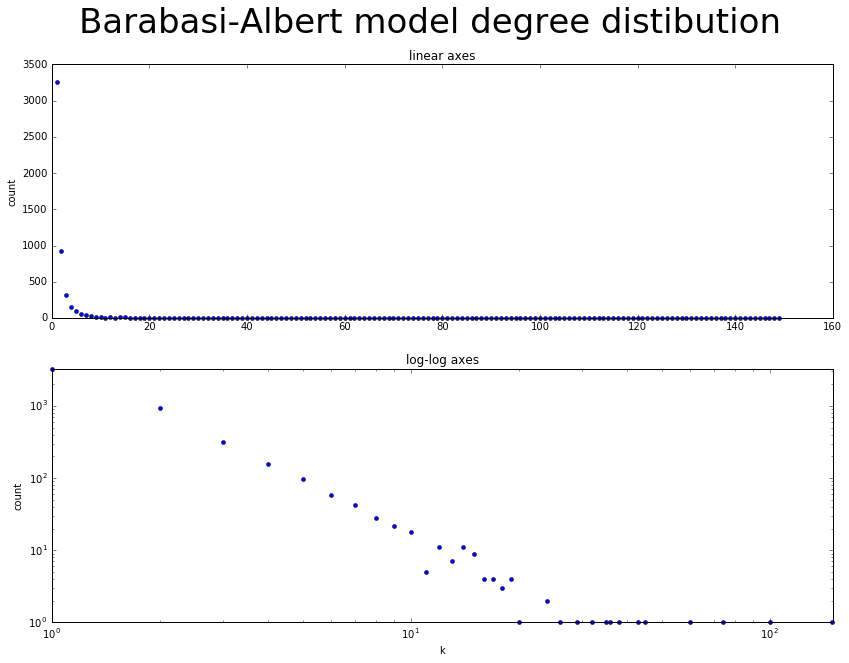

In [133]:
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Barabasi-Albert model degree distibution', fontsize=34)

# plot binned data
plt.subplot('211')
plt.plot(bin_edges[:-1], hist, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("linear axes")

plt.subplot('212')
plt.loglog(bin_edges[:-1], hist, 'ro', color='blue', markersize=4, clip_on=False)
plt.title("log-log axes")
plt.axis([min(bin_edges), max(bin_edges), min(hist), max(hist)])
plt.xlabel("k")
plt.ylabel("count")
plt.show()

## Power-laws and the friendship paradox

** a) Pick a node i at random (e.g. use random.choice). Find its degree. **

In [223]:
i = rand.choice(G.nodes())
iDegree = G.degree(i)

print ("Random node i:", i)
print ("Degree:", iDegree)

Random node i: 39
Degree: 2


** b) Find i's neighbors. And calculate their average degree. **

In [236]:
iNeighbors = G.neighbors(i)
fpDegree = sum(G.degree(iNeighbors).values()) / float(len(iNeighbors))

print ("Random node i:", i)
print ("Degree:", iDegree)
print ("Neighbors:", iNeighbors)
print ("Average degree of neighbors:", fpDegree)

SyntaxError: invalid syntax (<ipython-input-236-bbded5dfadac>, line 4)

** c) Compare the two numbers to check if it's true that i's friends (on average) have more friends than i. **

*** Answers ***
>***The comparsion depends on the node that the program retrieves. a random pick of node might end up to pick out the relatviely popular node and it has certainly higher degree than neigbors, while it might in contrast end up to pick a unpopular one and the result can then fit in the friendship paradox. ***


>*** As the result in next question shown, more than 80% of the cases have proved that it complies to the friendship paradox in our experiments. Therefore, we can conclude that friendship paradox is true ***

** d) Do this 1000 times. How many out of those 1000 times is the friendship paradox true? **

In [225]:
count = 0

for j in range(1000):
    i = rand.choice(G.nodes())
    iDegree = G.degree(i)
    iNeighbors = G.neighbors(i) 
    fpDegree = sum(G.degree(iNeighbors).values()) / float(len(iNeighbors))
    
    if fpDegree > iDegree:
        count += 1
        
print ("Counts of true:", count, " / 1000")

Counts of true: 881  / 1000


## Growth without preferential attachment

** Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Compare the network you've just built to the ER network of same size and same p. What are the differences? Explain in your own words. **

In [189]:

from __future__ import division

def get_average_degree(graph, nodes=None, print_edges=False):
    if not nodes:
        nodes = graph.nodes()
    deg_graph = graph.degree(nbunch=nodes)
    sum_of_edges = sum(deg_graph.values())
    deg = sum_of_edges/len(nodes)
    if print_edges:
        return deg, deg_graph.values()
    return deg

BA = nx.Graph();
nodes = [0,1]
BA.add_nodes_from(nodes)
BA.add_edge(0,1)

# Growth Mechanism without preferenctial attachment
for node in xrange(2, 5000):
    # add another node
    BA.add_node(node)
    # connect to one of the existing nodes, choose randomly
    con_n = rand.choice(nodes)
    # add edge
    BA.add_edge(node, con_n)
    # extend list of all nodes with node pair
    # is proportional to its connections
    nodes.append(node)


N = BA.number_of_nodes()
k = get_average_degree(BA)



# Erdős-Rényi without preferential attachment
# http://networkx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph
p = k/(N-1)
ER = nx.erdos_renyi_graph(N, p)

In [197]:
# get degree distribution
deg_seq_BA = sorted(nx.degree(BA).values(), reverse=True)
d_min_BA = min(deg_seq_BA)
d_max_BA = max(deg_seq_BA)
print ("BA maximum degree:", d_max_BA, "minimum degree:", d_min_BA)

deg_seq_ER = sorted(nx.degree(ER).values(), reverse=True)
d_min_ER = min(deg_seq_ER)
d_max_ER = max(deg_seq_ER)
print ("ER maximum degree:", d_max_ER, "minimum degree:", d_min_ER)
print (k)

BA maximum degree: 13 minimum degree: 1
ER maximum degree: 10 minimum degree: 0
1.9996


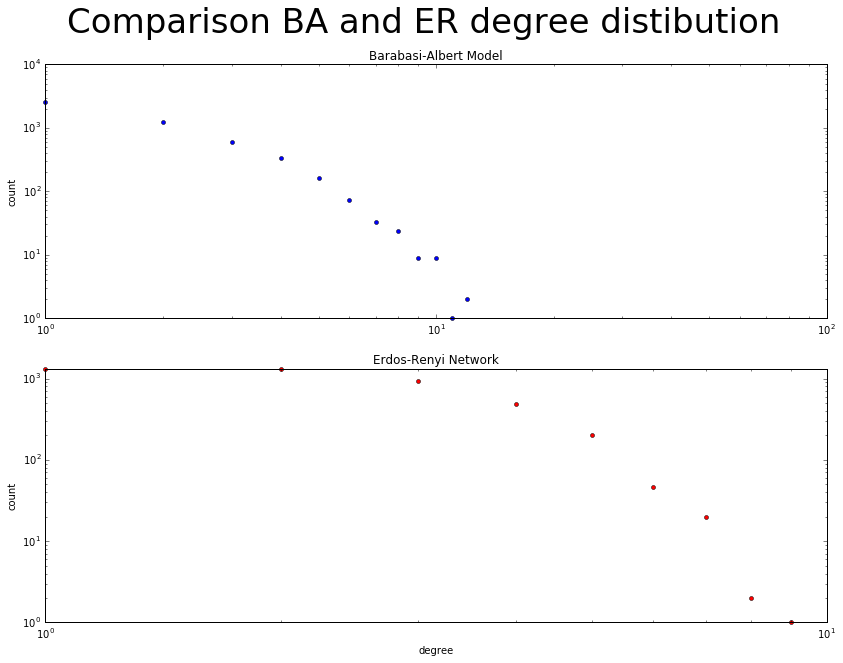

In [196]:
# look at degree distribution
bins_BA = xrange(d_min_BA, d_max_BA+1) 
hist_BA, bin_edg_BA = np.histogram(deg_seq_BA, bins=bins_BA)

bins_ER = xrange(d_min_ER, d_max_ER+1) 
hist_ER, bin_edg_ER = np.histogram(deg_seq_ER, bins=bins_ER)

fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Comparison BA and ER degree distibution', fontsize=34)

# plot binned data
plt.subplot('211')
plt.loglog(bin_edg_BA[:-1], hist_BA, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("Barabasi-Albert Model")

plt.subplot('212')
plt.loglog(bin_edg_ER[:-1], hist_ER, 'ro', color='red', markersize=4, clip_on=False)
plt.axis([min(bin_edg_ER), max(bin_edg_ER), min(hist_ER), max(hist_ER)])
plt.title("Erdos-Renyi Network")
plt.xlabel("degree")
plt.ylabel("count")
plt.show()

In [193]:
# number of connected components
sub_G = sorted(nx.connected_component_subgraphs(BA), key=len, reverse=True)
sub_ER = sorted(nx.connected_component_subgraphs(ER), key=len, reverse=True)

gcc_G = sub_G[0]
gcc_ER = sub_ER[0]

num_G = sum(x.size() > 0 for x in sub_G)
num_ER = sum(x.size() > 0 for x in sub_ER)

print ('Size of giant connected component of BA is {0} and of ER is {1}'.format(gcc_G.size(), gcc_ER.size()))
print ('Number of connected components of BA is {0} and of ER is {1}'.format(num_G, num_ER))

Size of giant connected component of BA is 4999 and of ER is 4899
Number of connected components of BA is 1 and of ER is 128


>*** Answer: ***

>*** Both graphs comply to a descending trend while the quantity of nodes decrease while the dergee of the nodes increase, which explains that the more attractive, the fewer there are. ***

>*** In BA, all nodes are connected together to construct one and only one ginat component as everytime when a new node is introduced to the graph, it has to be linked with one of the existing node within the giant component. ***

>***In Contrast, ER model does not follow the rule, so it generates a random network with existance of both the giant connected component and other inferior connected component. the average degree of the ER graph is saved in variable k(k =1.9996)
which matches the scenario that ln5000>k>1. The ER random network is in supercritical regime (only one giant component along with several small connected components)***


# Part 2: The Wikipedia Philosopher's network

## Basic stats

** a) How many philosophers in each list? How many total? **

In [205]:
%reset -f

from bs4 import BeautifulSoup
import io
import re
import os
import requests
import pprint
#create landing space for jsons if not exist
if not os.path.isdir("/philosophers"):
    os.makedirs("/philosophers")
    
#if you have the local copy of 6 lists, use the code below to open files
#aes_file = io.open('aestheticians.txt','r',encoding='utf-8')
#epi_file = io.open('epistemologists.txt','r',encoding='utf-8')
#eth_file = io.open('ethicists.txt','r',encoding='utf-8')
#log_file = io.open('logicians.txt','r',encoding='utf-8')
#met_file = io.open('metaphysicians.txt','r',encoding='utf-8')
#sap_file = io.open('social and political philosophers.txt','r',encoding='utf-8')
#aes_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', aes_file.read(),re.UNICODE)
#epi_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', epi_file.read(),re.UNICODE)
#eth_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', eth_file.read(),re.UNICODE)
#log_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', log_file.read(),re.UNICODE) #log
#met_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', met_file.read(),re.UNICODE) #met
#sap_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', sap_file.read(),re.UNICODE)

#otherwise, get the latest lists by the approach below
aes_link='https://en.wikipedia.org/w/index.php?title=List_of_aestheticians&action=edit'
epi_link='https://en.wikipedia.org/w/index.php?title=List_of_epistemologists&action=edit'
eth_link='https://en.wikipedia.org/w/index.php?title=List_of_ethicists&action=edit'
log_link='https://en.wikipedia.org/w/index.php?title=List_of_logicians&action=edit'
met_link='https://en.wikipedia.org/w/index.php?title=List_of_metaphysicians&action=edit'
sap_link='https://en.wikipedia.org/w/index.php?title=List_of_social_and_political_philosophers&action=edit'
aes_text=BeautifulSoup(requests.get(aes_link).text,'html.parser').find('textarea').get_text()
epi_text=BeautifulSoup(requests.get(epi_link).text,'html.parser').find('textarea').get_text()
eth_text=BeautifulSoup(requests.get(eth_link).text,'html.parser').find('textarea').get_text()
log_text=BeautifulSoup(requests.get(log_link).text,'html.parser').find('textarea').get_text()
met_text=BeautifulSoup(requests.get(met_link).text,'html.parser').find('textarea').get_text()
sap_text=BeautifulSoup(requests.get(sap_link).text,'html.parser').find('textarea').get_text()
aes_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', aes_text,re.UNICODE)
epi_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', epi_text,re.UNICODE)
eth_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', eth_text,re.UNICODE)
log_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', log_text,re.UNICODE) #log
met_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', met_text,re.UNICODE) #met
sap_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', sap_text,re.UNICODE)



comb_list=[]
comb_dup_list=[]
comb_aes_list=[]
comb_epi_list=[]
comb_eth_list=[]
comb_log_list=[]
comb_met_list=[]
comb_sap_list=[]
# put all into a dictionary
all_matches = {
    'all': set()
}
#print len(aes_phys)
for aes_phy in aes_phys:  #print each phyloer of the list 
    aes_phy=aes_phy[3].split('|')[0]
    comb_aes_list.append(aes_phy)
for epi_phy in epi_phys:  #print each phyloer of the list 
    epi_phy=epi_phy[3].split('|')[0]
    comb_epi_list.append(epi_phy)
for eth_phy in eth_phys:  #print each phyloer of the list 
    if re.match(r'List of.*', eth_phy[3], re.IGNORECASE):
        continue
    eth_phy=eth_phy[3].split('|')[0]
    comb_eth_list.append(eth_phy)
for log_phy in log_phys:  #print each phyloer of the list 
    log_phy=log_phy[3].split('|')[0]
    comb_log_list.append(log_phy)
for met_phy in met_phys:  #print each phyloer of the list 
    met_phy=met_phy[3].split('|')[0]
    comb_met_list.append(met_phy)
for sap_phy in sap_phys:  #print each phyloer of the list 
    if re.match(r'List of.*', sap_phy[3], re.IGNORECASE):
        continue
    sap_phy=sap_phy[3].split('|')[0]
    comb_sap_list.append(sap_phy)

#combined list without duplicated values
comb_dup_list=comb_aes_list+comb_epi_list + comb_met_list + comb_eth_list + comb_log_list + comb_sap_list
comb_list=set(comb_dup_list)

all_matches['aestheticians'] = comb_aes_list
all_matches['epistemologists'] = comb_epi_list
all_matches['ethicists'] = comb_met_list
all_matches['logicians'] = comb_eth_list
all_matches['metaphysicians'] = comb_log_list
all_matches['social and political philosophers"'] = comb_sap_list
all_matches['all'] = comb_list

#size of each list
print("size of Aestheticians",len(comb_aes_list))
print("size of Epistemologists",len(comb_epi_list))
print("size of Ethicists",len(comb_eth_list))
print("size of Logicians",len(comb_log_list))
print("size of Metaphysicians",len(comb_met_list))
print("size of Social and political philosophers",len(comb_sap_list))

print("total amount of philosophers including duplicated are", len(comb_dup_list))
print("total amount of philosophers are", len(comb_list))

#pprint.pprint(all_matches)

size of Aestheticians 126
size of Epistemologists 99
size of Ethicists 272
size of Logicians 271
size of Metaphysicians 96
size of Social and political philosophers 295
total amount of philosophers including duplicated are 1159
total amount of philosophers are 1010


>*** Beware: ***
 
> *** 1. the reason why we have a group (:nl:) in RE is because in logician list, there is Martinus Dorpius which can be directed from "Martinus Dorpius". If a page has a link to [[Martinus Dorpius]] but the "Martinus Dorpius" saved in combined list is in format like [[:nl:Martinus Dorpius]], then the two links will not be matched but there is indeed a link between the page and Martinus Dorpius. To solve such issue, we intend extract the exact name Martinus Dorpius, thus we add in this group on purpose in RE ***
 
> *** 2. the reason for \s?St\.\s is because in ares list there are phyilosophers in format like *St. [[Thomas Aquinas]]. therefore, this specific senario is taken into accoutn and St. Thomas Aquinas has to be extracted from the list. ***
 
> *** 3. re.UNICODE is to make sure that we could extra all names regardless of dialect such as Spanish, French, German etc. spellings. ***
 


** b) Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages) **

In [206]:
#APPROACH 1
largest_branch = (0, None)
for x in all_matches:
    if x == 'all':
        continue
    if len(all_matches[x]) > largest_branch[0]:
        largest_branch = (len(all_matches[x]), x)
print ('The largest branch is "{0}" with {1} members'.format(largest_branch[1], largest_branch[0]))



#APPROACH 2
from collections import Counter

cnt = Counter()
for x in all_matches:
    if x == 'all':
        continue
    cnt[x] = len(all_matches[x])

maximum = max(list(cnt.values()))
# there might be more than one maximum, thus iterate
for x in cnt:
    if cnt[x] == maximum:
        print ('The largest branch is "{0}" with {1} members.'.format(x, maximum))

The largest branch is "social and political philosophers"" with 295 members
The largest branch is "social and political philosophers"" with 295 members.


>*** Answer: The Social and Political branch is the largest with 295 philosophers. ***

** c) Which philosopher is in most lists & and how many? **

In [207]:
cnt = Counter()
for x in all_matches:
    if x == 'all':
        continue
    for i in all_matches[x]:
        cnt[i] += 1
        
maximum = max(list(cnt.values()))
# there might be more than one maximum, thus iterate
for x in cnt:
    if cnt[x] == maximum:
        print ('The philosopher {0} is in {1} lists.'.format(x, maximum))

The philosopher Thomas Aquinas is in 6 lists.
The philosopher Aristotle is in 6 lists.


>*** Answer: Aristitle and Thomas Aquinas share the first place, as both are represented in all 6 lists.  ***

** d) Create a list of every philosopher that occurs in more than one list. **

In [36]:
#How many phyilosophers appeared more than once among the 6 lists
cnt = Counter()
for x in all_matches:
    if x == 'all':
        continue
    for i in all_matches[x]:
        cnt[i] += 1
print ('First of all, there are {0} philosophers in more than one list.'.format(len([x for x in cnt if cnt[x] > 1])))


#Sort them in the list
cnt = Counter()
for x in all_matches:
    if x == 'all':
        continue
    for i in all_matches[x]:
        cnt[i] += 1
print("\nThe sorted list of philosophers that appear multiple times among the list:\n")
print(sorted([(x, cnt[x]) for x in cnt if cnt[x] > 1], key=lambda x: x[1], reverse=True))


First of all, there are 116 philosophers in more than one list.

The sorted list of philosophers that appear multiple times among the list:

[(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5), (u'Ayn Rand', 4), (u'Gottfried Leibniz', 3), (u'Georg Wilhelm Friedrich Hegel', 3), (u'S\xf8ren Kierkegaard', 3), (u'Nelson Goodman', 3), (u'Ludwig Wittgenstein', 3), (u'John Locke', 3), (u'Judith Butler', 3), (u'David Hume', 3), (u'John Stuart Mill', 3), (u'Ruth Barcan Marcus', 3), (u'Arthur Schopenhauer', 3), (u'Mario Bunge', 3), (u'Susan Haack', 3), (u'Christian Wolff (philosopher)', 2), (u'Martin Heidegger', 2), (u'Joxe Azurmendi', 2), (u'Socrates', 2), (u'George Berkeley', 2), (u'Jean-Fran\xe7ois Lyotard', 2), (u'Mozi', 2), (u'Giambattista Vico', 2), (u'Berit Brogaard', 2), (u'Peter of Spain (author)', 2), (u'Walter Benjamin', 2), (u'Graham Priest', 2), (u'Thomas Nagel', 2), (u'Baruch Spinoza', 2), (u'P. F. Strawson', 2), (u'John Hawtho

** e) Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list). **

>*** Answer: The list in last question is already sorted.***

** f) Print the top 5 guys and their list counts. Have you heard of any of them?  **

In [227]:
phy_mult=sorted([(x, cnt[x]) for x in cnt if cnt[x] > 1], key=lambda x: x[1], reverse=True)
print("top 5 from the list:",phy_mult[:5])

top 5 from the list: [(u'Thomas Aquinas', 6), (u'Aristotle', 6), (u'Plato', 5), (u'Bertrand Russell', 5), (u'Immanuel Kant', 5)]




>*** Answer: ***

>***All five philosophers are fairly influential. Their work, theories and isms have had an impact on history to this day. Most if not all of these names are a part of the curriculum in the danish school system, meaning that most should have heard of these philosophers.  ***

## Degree distribution

** a) Why do you think we want to use a directed graph? Could have we used an undirected graph instead? **




>*** Answers: ***

>*** Depends on the circustances, use case of the data and how you interpret 'links' between philosphers.***
>* Generally, a hyperlink in computing universe is a directed link from one source to data at other locations. therefore, a >directed graph would be insense in the first place, while an edge in an undirected graph is considered bidirectional which is >not true for hyperlink.  
>* However, undirected graph, in some circustances, can also be properly mounted on the philospher network. If the intention is >to clarify whether two given philosphers are ever related or just came across each other by any meanings (f.x they met each >other during lifetime), then undirected graph is considered to be sufficient as it represents a bidrectional relationship.
>* If the purpose of the graph, for instance, is to show influence betweeen philosphers' theories, then directed graphs are >necessary. An example is the relationship between Plato and Aristotle. Aristotle was largely influenced by Plato (Aristotle was >his student), which would indicate a one-way (directional) path between the two.


In [ ]:
import urllib
import urllib2

# downlaod all pages of phys from wiki

baseurl="https://en.wikipedia.org/w/api.php?"
action="action=query"
content="prop=revisions&rvprop=content"
dataformat="format=json"
for phy in comb_list:
    titles = "titles="+urllib.quote(phy.encode('utf-8'))
    query = "%s&%s&%s&%s&%s" % (baseurl,action,titles,content,dataformat)
    #print (query)
    page=urllib2.urlopen(query).read()
    with open('philosophers/'+titles+'.json','wb') as output:
        output.write(page)

** b) What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree? **

In [230]:
%matplotlib inline
import networkx as nx
import json, os
import glob
from matplotlib import pyplot as plt
import numpy as np

DG = nx.DiGraph()
for phy in comb_list:
    DG.add_node(phy)
print ("Total number of nodes",nx.number_of_nodes(DG))    

path_to_json = 'philosophers/'
json_files = [pos_json for pos_json in os.listdir(path_to_json)] #read all json files in that dir

link_all=[]
page_out_links=[]
for json_file in json_files:
    json_page=json.loads(open(path_to_json+json_file).read())    
    page_key=json_page['query']['pages'].keys()[0]
    page_name=json_page['query']['pages'][page_key]['title'] #phy name 
    if 'revisions' in json_page['query']['pages'][page_key].keys(): #if revision key exist
        
        page_info=json_page['query']['pages'][page_key]['revisions'][0]['*']
        page_links=re.findall(r'\[\[(\:nl\:)*(.+?)\]\]', page_info,re.UNICODE)        
        for page_link in page_links:
            link_tag = page_link[1].split('|')[0]
            if(link_tag in comb_list) and (link_tag!=page_name): #if the link_tag notin combined list & not a self-link
                DG.add_edge(page_name,link_tag)

print ("Total number of nodes",nx.number_of_edges(DG))   

deg_sequence = sorted(nx.degree(DG).values(), reverse=True)

dmean = np.mean(deg_sequence)
dmedian = np.median(np.array(deg_sequence))

print ('The average degree in the philosopher network is', dmean)
print ('The median degree in the philosopher network is', dmedian)

Total number of nodes 1010
Total number of nodes 4414
The average degree in the philosopher network is 8.61268292683
The median degree in the philosopher network is 4.0


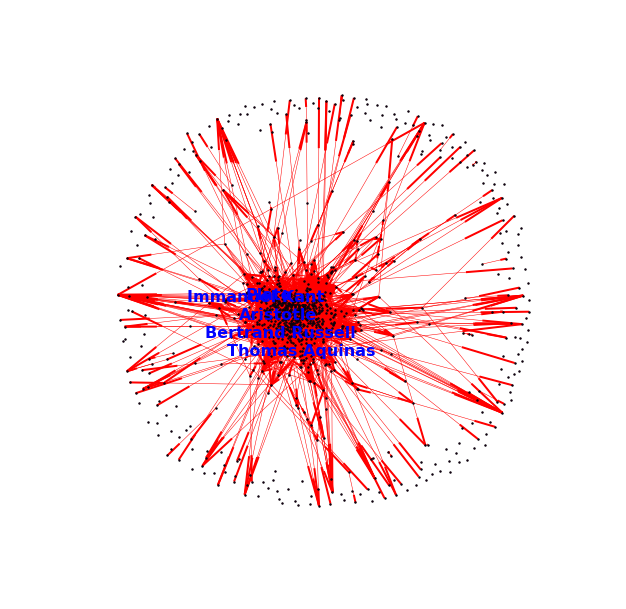

In [233]:
import matplotlib.pyplot as plt
%matplotlib inline
labels={}
for phy_mul in phy_mult[:5]:
     labels[phy_mul[0]] = phy_mul[0]

pos=nx.spring_layout(DG)
plt.figure(num=None, figsize=(8, 8), dpi=1200)
nx.draw(DG,pos,node_size=2,edge_color='r',node_color='m',width=0.5)
nx.draw_networkx_labels(DG, pos, labels, font_size=16, , font_color='b', font_weight='bold')
plt.show()

> ***the name of top 5 most mentioned philosophers are labeled in the graph. Due to the great number of nodes, the texts of their names are reluctantly overlapped each other. But theortically, they are placed at exact location above the corresponding nodes to the 5 philosophers.***

** d) List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before? **

In [69]:
import operator

print ('Top 10 philosophers by in-degree:\n', sorted(DG.in_degree_iter(), key=operator.itemgetter(1), reverse=True)[0:10])
print ('\n\nTop 10 philosophers by out-degree:\n', sorted(DG.out_degree_iter(), key=operator.itemgetter(1), reverse=True)[0:10])

Top 10 philosophers by in-degree:
 [(u'Immanuel Kant', 127), (u'Aristotle', 118), (u'Plato', 87), (u'Bertrand Russell', 85), (u'Karl Marx', 80), (u'Friedrich Nietzsche', 64), (u'David Hume', 63), (u'Ludwig Wittgenstein', 61), (u'John Stuart Mill', 57), (u'Georg Wilhelm Friedrich Hegel', 55)]


Top 10 philosophers by out-degree:
 [(u'Georg Wilhelm Friedrich Hegel', 50), (u'Friedrich Nietzsche', 44), (u'Immanuel Kant', 42), (u'Martin Heidegger', 40), (u'Bertrand Russell', 40), (u'David Hume', 38), (u'S\xf8ren Kierkegaard', 33), (u'John Stuart Mill', 32), (u'Plato', 31), (u'Michel Foucault', 31)]




** e) Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree? **



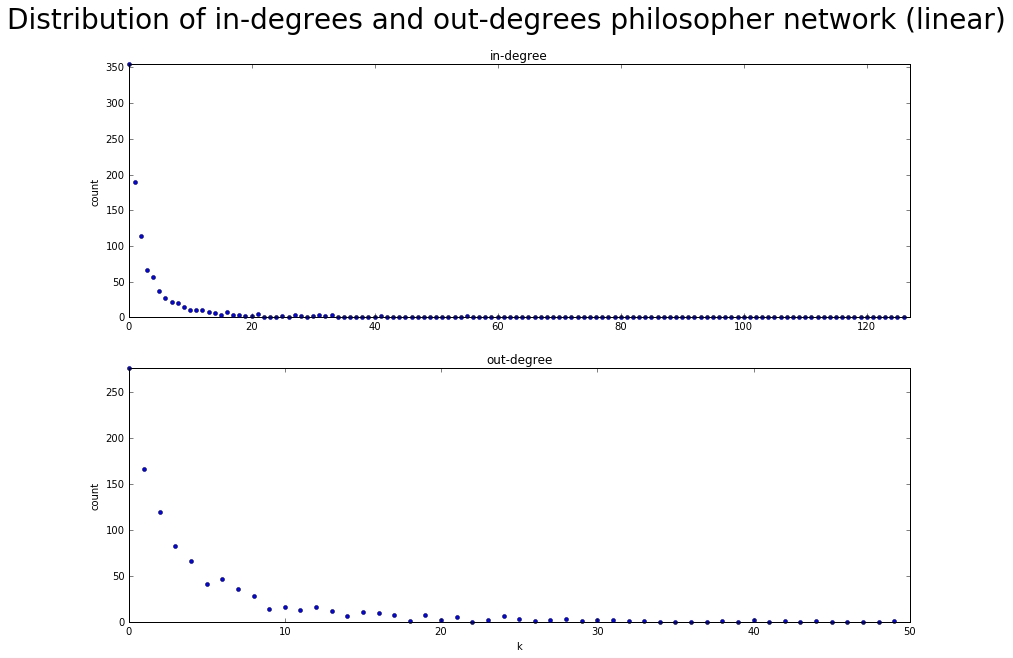

Most common in-degree: 1.0
Most common out-degree: 2.0


In [70]:
deg_sequence_in = sorted(DG.in_degree().values(), reverse=True)
dmax_in = max(deg_sequence_in)
dmin_in = min(deg_sequence_in)

deg_sequence_out = sorted(DG.out_degree().values(), reverse=True)
dmax_out = max(deg_sequence_out)
dmin_out = min(deg_sequence_out)

# set figure
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Distribution of in-degrees and out-degrees philosopher network (linear)', fontsize=28)

# generate histograms
p_bin_in = xrange(dmin_in, dmax_in+1)
hist_in, bin_edg_in = np.histogram(deg_sequence_in, bins=p_bin_in)

p_bin_out = xrange(dmin_out, dmax_out+1)
hist_out, bin_edg_out = np.histogram(deg_sequence_out, bins=p_bin_out)

# set histogram data and dimension
plt.subplot('211')
plt.plot(bin_edg_in[:-1], hist_in, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_in), max(bin_edg_in), min(hist_in), max(hist_in)])

plt.ylabel("count")
plt.title("in-degree")

plt.subplot('212')
plt.plot(bin_edg_out[:-1], hist_out, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_out), max(bin_edg_out), min(hist_out), max(hist_out)])
plt.xlabel('k')
plt.ylabel('count')
plt.title("out-degree")
plt.show()

print ("Most common in-degree:", np.median(np.array(deg_sequence_in)))
print ("Most common out-degree:", np.median(np.array(deg_sequence_out)))

** f) Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale. **

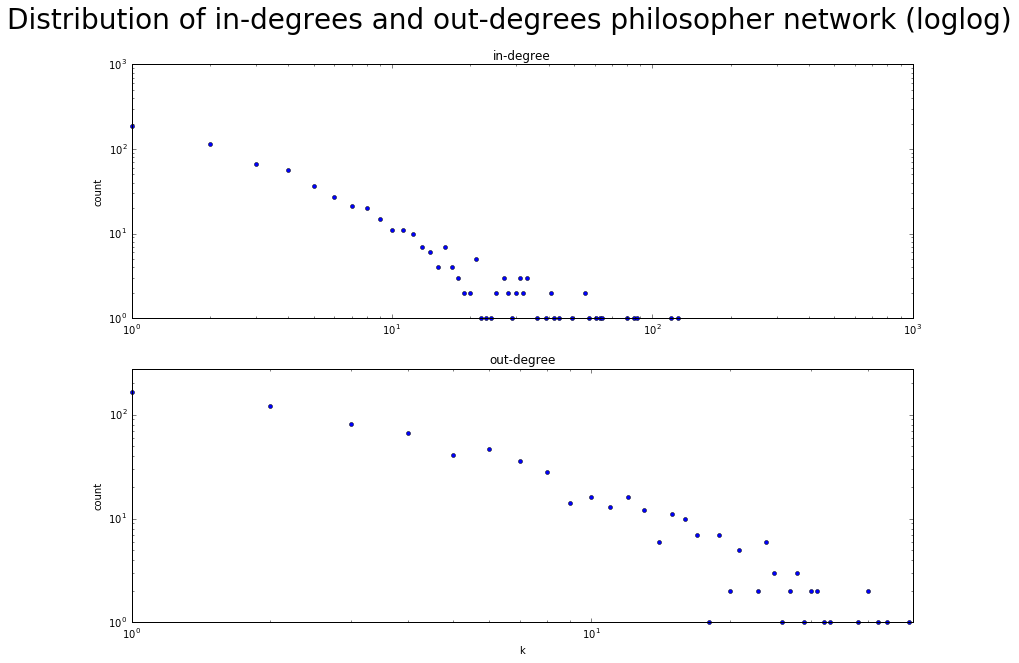

In [71]:
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Distribution of in-degrees and out-degrees philosopher network (loglog)', fontsize=28)

plt.subplot('211')
plt.loglog(bin_edg_in[:-1], hist_in, 'ro', color='blue', markersize=4, clip_on=False)
plt.ylabel("count")
plt.title("in-degree")

plt.subplot('212')
plt.loglog(bin_edg_out[:-1], hist_out, 'ro', color='blue', markersize=4, clip_on=False)
plt.axis([min(bin_edg_out), max(bin_edg_out), min(hist_out), max(hist_out)])
plt.xlabel('k')
plt.ylabel('count')
plt.title("out-degree")
plt.show()

** g) Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? **

>*** Answers: ***
>* The in-degree distribution in the philosophers network follows the power-law. A popular philosopher gets much more attention. >The incoming links follow preferential attachment.

>* The out-degree distribution follows something between power-law and poisson, because a document cannot be infinitely long and >thus have innumerable out-degree links.

** h) Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out? **

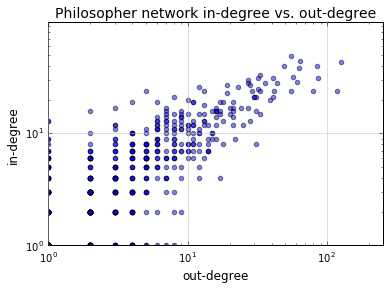

Correlation coefficient is: 0.792773482816


In [235]:
in_deg_val = DG.in_degree().values()
out_deg_val = DG.out_degree().values()

fig, ax = plt.subplots()

ax.set_title("Philosopher network in-degree vs. out-degree", fontsize=14)
ax.set_xlabel("out-degree", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_xlim([1, max(in_deg_val) * 2])
ax.set_ylim([1, max(out_deg_val) * 2])
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(in_deg_val, out_deg_val, alpha=0.5)

plt.show()

print ('Correlation coefficient is: {0}'.format(np.corrcoef(x=out_deg_val, y=in_deg_val)[0,1]))

>***The relation between the two plots is positive correlation. (Correlation coefficient between in and out-degree is around 0.79)***